In [1]:
from heeps.util.freq_decomp import fit_zer
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import proper

In [2]:
# date: 20120905, made using the maximum M1 diameter
diam = 39.146
# 01-11 phase maps are simulated (wavelength of raytrace is also shown) and calculated in nm
# IMG-LM PP1 (3.7um)
frame03 = fits.getdata('/Users/cdelacroix/heeps_metis/input_files/wavefront/ncpa/MC_T0001_03.fits')[1:,1:]
# LMS PP1 (3.7um)
frame07 = fits.getdata('/Users/cdelacroix/heeps_metis/input_files/wavefront/ncpa/MC_T0001_07.fits')[1:,1:]
# phase difference
DIFF = frame07 - frame03

rms = 131.21 nm


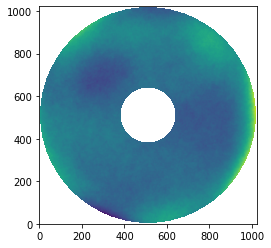

In [3]:
plt.imshow(DIFF, origin='lower');
print('rms = %.2f nm'%np.nanstd(DIFF))

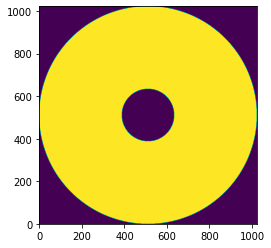

In [4]:
pup = (DIFF==DIFF)#.astype(int)
plt.imshow(pup, origin='lower');

In [5]:
Z = fit_zer(pup, 1023/2, 12, DIFF)
print('piston = %.2f'%np.round(np.nanmean(DIFF),2))
print('all zernike:\n', np.array([(i+1, round(x,2)) for i, x in enumerate(Z)]))

piston = 195.10
all zernike:
 [[  1.   191.68]
 [  2.    19.22]
 [  3.    16.97]
 [  4.    74.77]
 [  5.     0.68]
 [  6.    17.02]
 [  7.    -0.31]
 [  8.    29.74]
 [  9.    -5.88]
 [ 10.    -8.84]
 [ 11.    31.75]
 [ 12.    40.53]]


### visualize (vertical) astigmatism

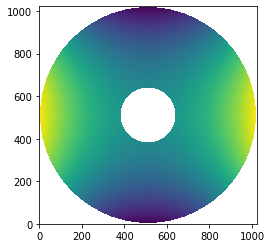

In [6]:
wf = proper.prop_begin(1,1,1023, 1)
Zpup = proper.prop_zernikes(wf, [6], [40]).astype('float32')
plt.imshow(Zpup*DIFF/DIFF, origin='lower');

### visualize (horizontal) coma

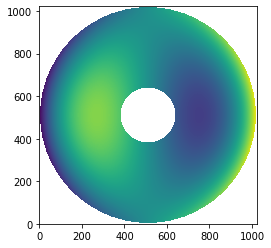

In [7]:
wf = proper.prop_begin(1,1,1023, 1)
Zpup = proper.prop_zernikes(wf, [8], [40]).astype('float32')
plt.imshow(Zpup*DIFF/DIFF, origin='lower');

### Test tip/tilt and LS misalignment

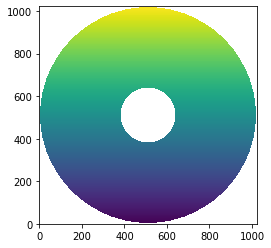

In [8]:
wf = proper.prop_begin(1,1,1023, 1)
Zpup = proper.prop_zernikes(wf, [3], [40]).astype('float32')
plt.imshow(Zpup*DIFF/DIFF, origin='lower');

Load pupil from 'ELT_allglass.fits'


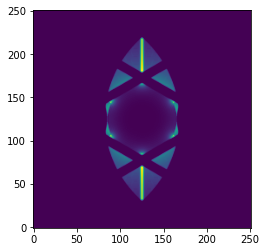

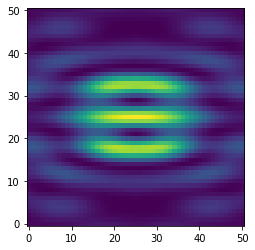

In [9]:
import heeps
import proper
from heeps.util.img_processing import crop_img
from heeps.wavefront.get_array import get_wf
conf = heeps.config.read_config()
conf['mode']='CVC'
conf['ls_misalign']=[0, 0]
wf = heeps.pupil.pupil(savefits=True, verbose=True, **conf)
#proper.prop_zernikes(wf, [2,3], np.array([800e-9,0], ndmin=1))
wf = heeps.optics.fp_mask(wf, **conf)
conf['ls_misalign']=[0.30, 0]
wf = heeps.optics.lyot_stop(wf, **conf)
conf['ls_misalign']=[-0.30, 0]
wf = heeps.optics.lyot_stop(wf, **conf)
A = get_wf(wf, 'amp')
plt.figure(); plt.imshow(crop_img(A, 251), origin='lower')
psf = heeps.optics.detector(wf, **conf)
plt.figure(); plt.imshow(crop_img(psf, 51), origin='lower');